# New Section

**Import Library**

In [6]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from scipy.ndimage import zoom
import numpy as np # linear algebra
import pandas as pd # data processing,
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [7]:
for dirname, _, filenames in os.walk('/content/drive/MyDrive/archive (3)'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/archive (3)/train_labels.npy
/content/drive/MyDrive/archive (3)/test_labels.npy
/content/drive/MyDrive/archive (3)/test_images.npy
/content/drive/MyDrive/archive (3)/train_images.npy


In [8]:
label_names = ['','angry','disgust','fear','happy','neutral','sad','surprise']


In [9]:
# Load the data and preprocess it (assuming you have loaded your data here)
training_images = np.load("/content/drive/MyDrive/archive (3)/train_images.npy")
training_labels = np.load("/content/drive/MyDrive/archive (3)/train_labels.npy")
testing_images = np.load("/content/drive/MyDrive/archive (3)/test_images.npy")
testing_labels = np.load("/content/drive/MyDrive/archive (3)/test_labels.npy")


In [10]:
# Normalize the images to values between 0 and 1
training_images = training_images.astype('float32') / 255.0
testing_images = testing_images.astype('float32') / 255.0


In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
# Convert labels to categorical format
num_classes = len(label_names)  # Number of facial expression classes
training_labels = tf.keras.utils.to_categorical(training_labels, num_classes)
testing_labels = tf.keras.utils.to_categorical(testing_labels, num_classes)


In [13]:
# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)


In [14]:
# Expanding dimensions for grayscale images
training_images = np.expand_dims(training_images, axis=-1)
testing_images = np.expand_dims(testing_images, axis=-1)


In [15]:
# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])


In [16]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [17]:
# Define the number of epochs and batch size
epochs = 15
batch_size = 24

# Training with data augmentation
history = model.fit(datagen.flow(training_images, training_labels, batch_size=batch_size),
                    epochs=epochs,
                    validation_data=(testing_images, testing_labels))


Epoch 1/15
1197/1197 [==============================] - 80s 66ms/step - loss: 1.7404 - accuracy: 0.2926 - val_loss: 1.5423 - val_accuracy: 0.4023
Epoch 2/15
1197/1197 [==============================] - 78s 65ms/step - loss: 1.5033 - accuracy: 0.4196 - val_loss: 1.3346 - val_accuracy: 0.4904
Epoch 3/15
1197/1197 [==============================] - 78s 65ms/step - loss: 1.3829 - accuracy: 0.4680 - val_loss: 1.2794 - val_accuracy: 0.5100
Epoch 4/15
1197/1197 [==============================] - 78s 65ms/step - loss: 1.3225 - accuracy: 0.4963 - val_loss: 1.2540 - val_accuracy: 0.5231
Epoch 5/15
1197/1197 [==============================] - 80s 67ms/step - loss: 1.2776 - accuracy: 0.5132 - val_loss: 1.2222 - val_accuracy: 0.5332
Epoch 6/15
1197/1197 [==============================] - 79s 66ms/step - loss: 1.2504 - accuracy: 0.5235 - val_loss: 1.2090 - val_accuracy: 0.5410
Epoch 7/15
1197/1197 [==============================] - 78s 65ms/step - loss: 1.2248 - accuracy: 0.5330 - val_loss: 1.1820 -

In [18]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(testing_images, testing_labels)
print("Test accuracy:", test_accuracy)


225/225 [==============================] - 5s 20ms/step - loss: 1.1268 - accuracy: 0.5821
Test accuracy: 0.5820562839508057


In [24]:
from tensorflow.keras.models import load_model, save_model

# Save the trained model
save_model(model, '/content/my_model.h5')

In [28]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from PIL import Image
from google.colab import files
from tensorflow.keras.models import load_model
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the saved model
model = load_model('/content/my_model.h5')  # Replace with your model path


In [48]:
# Upload the image
uploaded = files.upload()
# Load the image from the uploaded files
image_path = list(uploaded.keys())[0]
image = Image.open(image_path)


Saving download (1).jfif to download (1).jfif


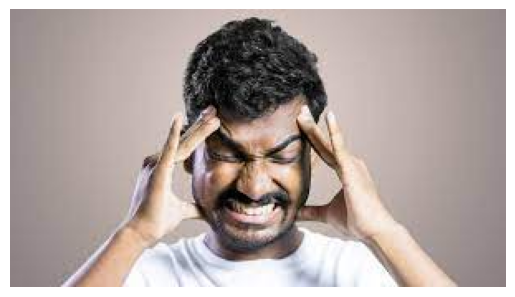

In [49]:
# Load the image from the uploaded files
image_path = list(uploaded.keys())[0]
image = Image.open(image_path)

# Display the image
plt.imshow(image)
plt.axis('off')
plt.show()

In [50]:
# Convert the PIL image to a NumPy array
image_array = np.array(image)

# Preprocess the image
image_array = cv2.resize(image_array, (48, 48))
image_array = cv2.cvtColor(image_array, cv2.COLOR_RGB2GRAY)
image_array = np.expand_dims(image_array, axis=-1)  # Add an extra dimension for the grayscale channel

# Normalize the image array (if your model requires it)
image_array = image_array.astype('float32') / 255.0




In [51]:
# Make predictions
predictions = model.predict(np.array([image_array]))  # Wrap the image_array in an additional batch dimension

# Get the predicted label
predicted_label_index = np.argmax(predictions[0])
predicted_label = label_names[predicted_label_index]

print("Predicted label:", predicted_label)


1/1 [==============================] - 0s 18ms/step
Predicted label: fear
